In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("./Data/automobile.csv")

In [46]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
# Identify and handle missing values

df.replace('?', np.nan, inplace = True)
missing_data = df.isnull()

In [48]:
# print columns which contain null values along with their nuch counts
for column in df.columns.values.tolist():
    if df[column].isnull().sum():
        print(column)
        print(df[column].isnull().sum())
        print("")

normalized-losses
41

num-of-doors
2

bore
4

stroke
4

horsepower
2

peak-rpm
2

price
4



In [49]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [50]:
# Deal with missing data. options:
# 1- Drop row
# 2- drop column
# 3- replace by mean
# 4- replace by high frequesnt value
# 5- replace based pn another function

# Replace by mean
avg_normalized_losses = df["normalized-losses"].astype("float").mean()
df["normalized-losses"]. replace(np.nan, avg_normalized_losses, inplace = True)

avg_stroke = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

#replace by frequesncy
print(df["num-of-doors"].value_counts())
# return the most common value of a column
df["num-of-doors"].value_counts().idxmax()
# replace the missing value with the most common value
df["num-of-doors"].replace(np.nan, df["num-of-doors"].value_counts().idxmax(), inplace = True)

#Drop the whole row
#Reason: Price is the target. Any data without it cannot be used for prediction
df.dropna(subset = ["price"], axis = 0, inplace = True)
# reset index
df.reset_index(drop = True, inplace = True) # drop = True drops the previous index column

four    114
two      89
Name: num-of-doors, dtype: int64


In [55]:
# Correct Data format
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [64]:
df["bore"].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', 3.3297512437810943, '3.39', '3.76', '3.58', '3.46',
       '3.80', '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70',
       '3.61', '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [66]:
df["stroke"].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', 3.255422885572139, '3.16', '3.64', '3.10', '3.35', '3.12',
       '3.86', '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07',
       '2.36', '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [67]:
df["normalized-losses"].unique()

array([122.0, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [69]:
df["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', 5125.369458128079, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [71]:
# Correct Data format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype('float')
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [75]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [82]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', 104.25615763546799, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [83]:
# Data standardization 

# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df["city-L/100km"] = 235/df["city-mpg"]
df.drop("city-mpg" , axis = 1, inplace = True)

df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns = {'highway-mpg':'highway-L/100km'})

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,10.681818,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,8.392857,16845.0,10.217391
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,9.400000,19045.0,12.368421
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,10.217391,21485.0,13.055556
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,8.703704,22470.0,9.038462


In [92]:
# data normalization
df[["length", "width","height"]].describe()

,length,width,height
count,201.000000,201.000000,201.000000
mean,174.200995,65.889055,53.766667
std,12.322175,2.101471,2.447822
min,141.100000,60.300000,47.800000
25%,166.800000,64.100000,52.000000
50%,173.200000,65.500000,54.100000
75%,183.500000,66.600000,55.500000
max,208.100000,72.000000,59.800000


In [93]:
df["length"] = (df["length"]- df["length"].mean())/df["length"].std()
df["width"] = (df["width"]- df["width"].mean())/df["width"].std()
df["height"] = (df["height"]- df["height"].mean())/df["height"].std()

df[["length","width","height"]].describe()

,length,width,height
count,2.010000e+02,2.010000e+02,2.010000e+02
mean,-1.590767e-16,8.484092e-16,4.949054e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.686295e+00,-2.659592e+00,-2.437541e+00
25%,-6.006241e-01,-8.513346e-01,-7.217300e-01
50%,-8.123525e-02,-1.851345e-01,1.361755e-01
75%,7.546561e-01,3.383084e-01,7.081124e-01
max,2.751057e+00,2.907937e+00,2.464776e+00


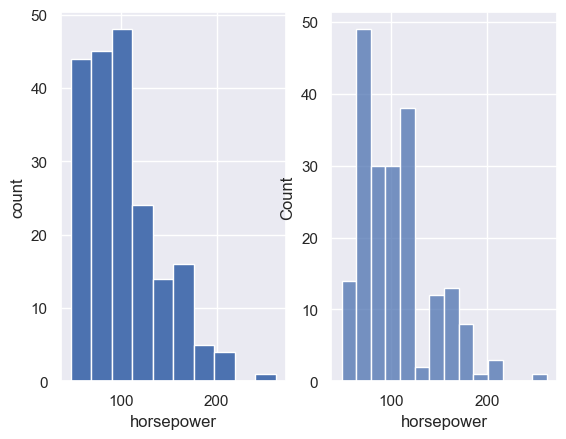

In [101]:
#binning

df["horsepower"]= df["horsepower"].astype('int', copy = True) #copy = True returns a copy - default is True
#be carefull copy = False changes to values then may propagate to other pandas objects

plt.subplot(1,2,1)
plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")

#or
plt.subplot(1,2,2)
sns.histplot(df["horsepower"])
plt.show() #x and y labels are automatically shown 
# and it's not because of setting for the previous plot above

#The difference in the plots is due to different binning

In [102]:
# Change data column and create 3 equally distanced bins/categories
bins = np.linspace(start = min(df["horsepower"]), stop = max(df["horsepower"]), num = 4)
group_names = ["Low", "Medium", "High"]
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels = group_names, include_lowest = True)
# include_lowest = False by default

print(f"bins: {bins}  min: {min(df['horsepower'])}  max:{max(df['horsepower'])}")
print(df[["horsepower-binned", "horsepower"]])

bins: [ 48.         119.33333333 190.66666667 262.        ]  min: 48  max:262
    horsepower-binned  horsepower
0                 Low         111
1                 Low         111
2              Medium         154
3                 Low         102
4                 Low         115
..                ...         ...
196               Low         114
197            Medium         160
198            Medium         134
199               Low         106
200               Low         114

[201 rows x 2 columns]


Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


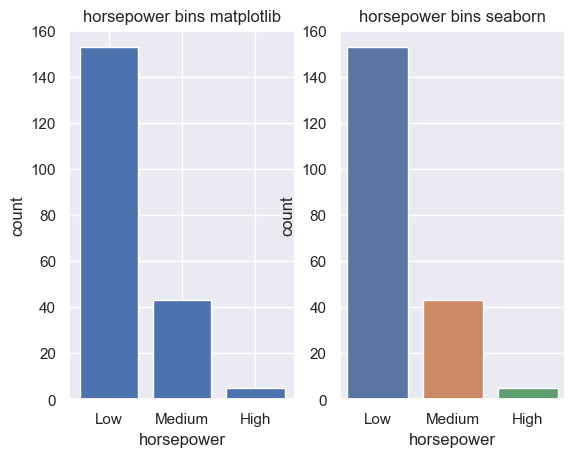

In [114]:
print(df["horsepower-binned"].value_counts())

plt.subplot(1,2,1)
plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins matplotlib")

#or

plt.subplot(1,2,2)
sns.barplot(x = group_names, y = df["horsepower-binned"].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins seaborn")

plt.show()

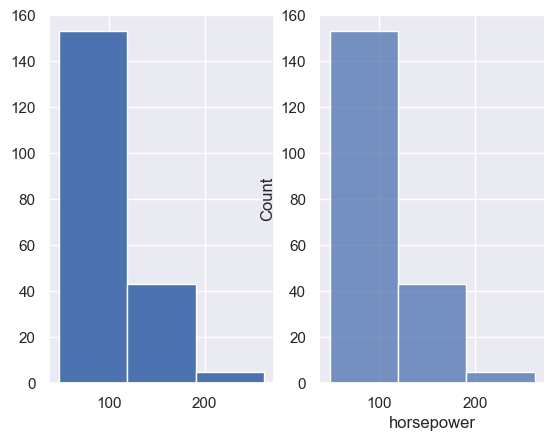

In [120]:
# Automatically create the bins for for plot 

plt.subplot(1,2,1)
plt.hist(df["horsepower"], bins = 3)

plt.subplot(1,2,2)
sns.histplot(df["horsepower"], bins = 3)

plt.show()

In [121]:
# indicator variable or Dummy Variable
print(df["fuel-type"].value_counts())
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1

gas       181
diesel     20
Name: fuel-type, dtype: int64


,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [122]:
dummy_variable_1.rename(columns = {"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace = True)

In [123]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis = 1)
df.drop("fuel-type", axis = 1, inplace = True)

In [124]:
dummy_variaple_2 = pd.get_dummies(df["aspiration"])
dummy_variaple_2.rename(columns = {"std":"aspiration-std", "turbo":"aspiration_turbo"}, inplace = True)

df = pd.concat([df,dummy_variaple_2], axis = 1)
df.drop("aspiration", axis = 1, inplace = True)